In [62]:
import pandas as pd
import json
import re
from tqdm import *
import os
import matplotlib.pyplot as plt

In [12]:
ROOT = 'kaggle_data/'
official_dataset = ROOT+'official_dataset'
cleaned_dataset = ROOT + 'cleaned_dataset'

In [114]:
os.listdir(official_dataset)

['ca_test_data_final.jsonl',
 'datapackage.json',
 'README.md',
 'us_test_data_final.jsonl',
 'us_train_data_final.jsonl']

In [115]:
train = official_dataset+'/us_test_data_final.jsonl'

In [116]:
with open(train, 'r') as fopen:
    var = fopen.readlines()

In [27]:
df = pd.DataFrame(json.loads(var[0]), index=[0])

In [28]:
df

,bill_id,summary,text,title,text_len,sum_len,clean_text,clean_summary,clean_title
0,112_hr461,(This measure has not been amended since it wa...,SECTION 1. SHORT TITLE.\n\n This Act may be...,To direct the Secretary of the Interior to con...,8025,2597,<SECTION-HEADER> SHORT TITLE. This Act may be ...,South Utah Valley Electric Conveyance Act - Re...,To direct the Secretary of the Interior to con...


In [30]:
df.summary[0]

'(This measure has not been amended since it was reported to the House on September 23, 2011. The summary of that version is repeated here.)\n\nSouth Utah Valley Electric Conveyance Act - Requires the Secretary of the Interior, insofar as the Strawberry Water Users Association conveyed its interest in an electric distribution system to the South Utah Valley Electric Service District, to convey and assign to the District: (1) all interest of the United States in all fixtures owned by the United States as part of the electric distribution system and the federal lands and interests where the fixtures are located, (2) license for use in perpetuity of the shared power poles, and (3) licenses for use and access in perpetuity to specified project lands and interests and corridors where federal lands and interests are abutting public streets and roads and can provide access to facilities.\n\nRequires the District to assume all liability from the United States for the administration, operation,

In [34]:
re.sub('(\\n|\s{2})', '', df.text[0])

"SECTION 1. SHORT TITLE.This Act may be cited as the ``South Utah Valley ElectricConveyance Act''.SEC. 2. DEFINITIONS.In this Act:(1) District.--The term ``District'' means the South UtahValley Electric Service District, organized under the laws ofthe State of Utah.(2) Electric distribution system.--The term ``ElectricDistribution System'' means fixtures, irrigation, or powerfacilities lands, distribution fixture lands, and shared powerpoles.(3) Fixtures.--The term ``fixtures'' means all power poles,cross-members, wires, insulators and associated fixtures,including substations, that--(A) comprise those portions of the StrawberryValley Project power distribution system that are ratedat a voltage of 12.5 kilovolts and were constructedwith Strawberry Valley Project revenues; and(B) any such fixtures that are located on Federallands and interests in lands.(4) Irrigation or power facilities lands.--The term``irrigation or power facilities lands'' means all Federallands and interests in land

In [35]:
df.clean_text[0]

'<SECTION-HEADER> SHORT TITLE. This Act may be cited as the "South Utah Valley Electric Conveyance Act". <SECTION-HEADER> DEFINITIONS. In this Act: District. The term "District" means the South Utah Valley Electric Service District, organized under the laws of the State of Utah. Electric distribution system. The term "Electric Distribution System" means fixtures, irrigation, or power facilities lands, distribution fixture lands, and shared power poles. Fixtures. The term "fixtures" means all power poles, cross-members, wires, insulators and associated fixtures, including substations, that comprise those portions of the Strawberry Valley Project power distribution system that are rated at a voltage of 12.5 kilovolts and were constructed with Strawberry Valley Project revenues. And any such fixtures that are located on Federal lands and interests in lands. Irrigation or power facilities lands. The term "irrigation or power facilities lands" means all Federal lands and interests in lands 

In [36]:
df.clean_summary[0]

'South Utah Valley Electric Conveyance Act - Requires the Secretary of the Interior, insofar as the Strawberry Water Users Association conveyed its interest in an electric distribution system to the South Utah Valley Electric Service District, to convey and assign to the District: (1) all interest of the United States in all fixtures owned by the United States as part of the electric distribution system and the federal lands and interests where the fixtures are located, (2) license for use in perpetuity of the shared power poles, and (3) licenses for use and access in perpetuity to specified project lands and interests and corridors where federal lands and interests are abutting public streets and roads and can provide access to facilities. Requires the District to assume all liability from the United States for the administration, operation, maintenance, and replacement of such electric distribution system. Requires the Secretary, before conveying such lands, interests, and fixtures, 

In [39]:
df2 = pd.DataFrame(json.loads(var[2]), index=[0])

In [43]:
df3 = pd.concat([df, df2])

In [117]:
for i in trange(len(var)):
    df2 = pd.DataFrame(json.loads(var[i]), index=[0])
    df = pd.concat([df, df2])
    del df2
#     if i%1000==0 and i!=0:
#         break

  0%|                                                                              | 0/5014 [00:00<?, ?it/s]C:\ProgramData\Miniconda3\envs\pygpu\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until
  3%|█▊                                                                  | 131/5014 [00:04<02:44, 29.63it/s]


KeyboardInterrupt: 

In [105]:
df.shape

(32421, 9)

In [106]:
df.head()

,bill_id,clean_summary,clean_text,clean_title,sum_len,summary,text,text_len,title
0,106_s2934,Prescribes minimum additional penalties for ca...,<SECTION-HEADER> SHORT TITLE. This Act may be ...,Zero Tolerance for Repeat Polluters Act of 2000,1389,NaN,NaN,14089,NaN
1,115_s962,Empowering State Forestry to Improve Forest He...,<SECTION-HEADER> SHORT TITLE. This Act may be ...,Empowering State Forestry to Improve Forest He...,1844,NaN,NaN,16762,NaN
2,110_hr5372,Recycling Investment Saves Energy or the RISE ...,<SECTION-HEADER> SHORT TITLE. This Act may be ...,To amend the Internal Revenue Code to allow a ...,433,NaN,NaN,10099,NaN
3,106_s584,Provides that: (1) if the Secretary determines...,<SECTION-HEADER> SHORT TITLE. This Act may be ...,"Children's Smoking Prevention, Health, and Lea...",453,NaN,NaN,8556,NaN
4,111_hr5557,Back to School Act of 2010 - Amends the Intern...,<SECTION-HEADER> SHORT TITLE. This Act may be ...,To amend the Internal Revenue Code of 1986 to ...,325,NaN,NaN,7276,NaN


In [107]:
df.drop_duplicates(keep=False, inplace=True)

In [108]:
df.index = range(len(df.index))

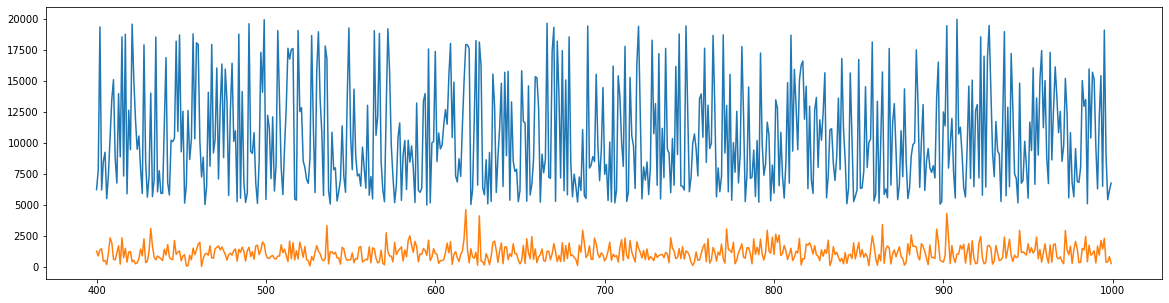

In [109]:
plt.figure(figsize=(20,5))
plt.plot(df.text_len[400:1000])
plt.plot(df.sum_len[400:1000])
plt.show()

In [112]:
df.drop(['summary', 'text', 'title' ], axis=1, inplace=True)

KeyError: "['summary' 'text' 'title'] not found in axis"

In [113]:
df.to_feather('us_test_data_final.ft')

In [111]:
df.shape

(32421, 6)

In [101]:
del df456